In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.odr import odrpack
%matplotlib widget

In [27]:
def fit_model(pars, x):
	k = pars[0]
	return 2*np.pi*np.sqrt(x / k)

def line(pars, x):
	a, b = pars
	return a*x + b

In [17]:
# functions
def iterated_fit(f, x, y, sigma_y, sigma_x):
	popt, pcov = curve_fit(f, x, y, sigma = sigma_y ,absolute_sigma = True)

	for i in range(5):
		sigma_eff = np.sqrt( sigma_y**2 + popt[0]*sigma_x**2)
		popt, pcov = curve_fit(f, x, y, sigma = sigma_eff, absolute_sigma=True)
		chisq = (((y - f(x,*popt))/sigma_eff)**2).sum()
		print(f"step {i}: popt = {popt}, chisq = {chisq}")

	return (popt, pcov)

def plotting(f, x, y, popt, sigma_y, sigma_x = 0):
	plt.clf()

	if (sigma_x.any() != 0):
		plt.subplot(2,1,1)
		plt.errorbar(x, y, sigma_y, xerr=sigma_x, fmt=".")

		x_range = np.linspace(x.min(), x.max(), 200)
		plt.plot(x_range, f(x_range, *popt))


		plt.title("Titolo")
		plt.ylabel("Temperatura")
		plt.grid(ls="dashed",which="both")
		
		plt.subplot(2,1,2)
		plt.errorbar(x, y-f(x, *popt),yerr=sigma_y, xerr=sigma_x, fmt=".")
		
		plt.ylabel("Residui")
		plt.xlabel("Distanza")
		plt.grid(ls="dashed",which="both")
		
		plt.plot(x_range, np.zeros(len(x_range)))
		
	else:
		plt.subplot(2,1,1)
		plt.errorbar(x, y, sigma_y)

		x_range = np.linspace(x.min(), x.max(), 200, fmt=".")
		plt.plot(x_range, f(x_range, *popt))
		
		plt.subplot(2,1,2)
		plt.errorbar(x, y-f(x, *popt), yerr=sigma_y)
		
		plt.plot(x_range, np.zeros(len(x_range)))
		
	plt.show()

def odr_fitting(f, x, y, dy, dx, beta0_in):
	model = odrpack.Model(f)
	data = odrpack.RealData(x, y, sx=dx, sy=dy)
	odr = odrpack.ODR(data, model, beta0 = beta0_in)
	out = odr.run()

	popt = out.beta
	pcov = out.cov_beta
	chisq = out.sum_square

	return (popt, pcov, chisq)

def odr_plotting(f, x, y, sigma_y, sigma_x, popt):
	plt.subplot(2,1,1)
	plt.errorbar(x, y, sigma_y, xerr=sigma_x, fmt=".")

	x_range = np.linspace(x.min(), x.max(), 200)
	plt.plot(x_range, f(popt ,x_range))


	plt.title("Titolo")
	plt.ylabel("Temperatura")
	plt.grid(ls="dashed",which="both")
		
	plt.subplot(2,1,2)
	plt.errorbar(x, y-f(popt, x),yerr=sigma_y, xerr=sigma_x, fmt=".")
		
	plt.ylabel("Residui")
	plt.xlabel("Distanza")
	plt.grid(ls="dashed",which="both")
		
	plt.plot(x_range, np.zeros(len(x_range)))

	plt.show()

k = 34.870601933896594


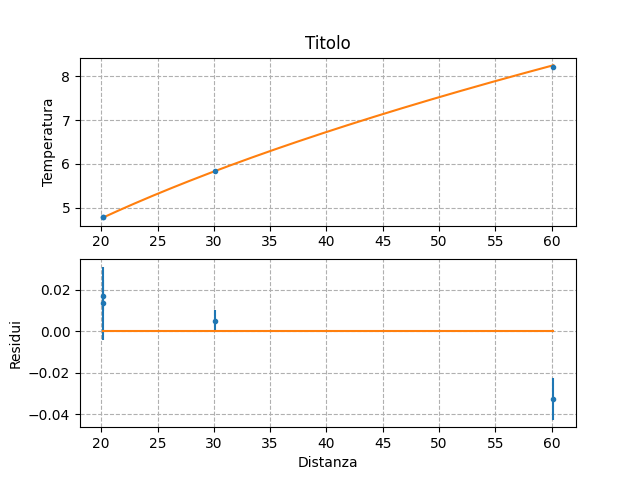

In [42]:
m = np.array([10.014, 10.009, 20.027, 50.045]) # in grammi
m_s = 7.808
m_m = 6.900

m_tot = m + m_s + m_m / 3
sigma_m = np.sqrt(0.001**2 + 0.001**2 + (0.001 / 3)**2) * np.ones_like(m)

T1 = np.array([4.76, 4.82, 4.77, 4.80, 4.79, 4.78, 4.81])
T2 = np.array([4.87, 4.74, 4.82, 4.80, 4.78, 4.77, 4.72])
T3 = np.array([5.85, 5.85, 5.82, 5.85, 5.84, 5.87, 5.84])
T4 = np.array([8.23, 8.25, 8.19, 8.17, 8.23, 8.23, 8.24])

m1 = T1.mean()
m2 = T2.mean()
m3 = T3.mean()
m4 = T4.mean()

s1 = T1.std()/np.sqrt(7)
s2 = T2.std()/np.sqrt(7)
s3 = T3.std()/np.sqrt(7)
s4 = T4.std()/np.sqrt(7)

T = np.array([m1, m2, m3, m4])
sigma_T = np.array([s1, s2, s3, s4])

# fitting
popt, pcov, chisq = odr_fitting(fit_model, m_tot, T, sigma_T, sigma_m, np.array([10.]))
print(f"k = {popt[0]}")

plt.clf()
odr_plotting(fit_model, m_tot, T, sigma_T, sigma_m, popt)



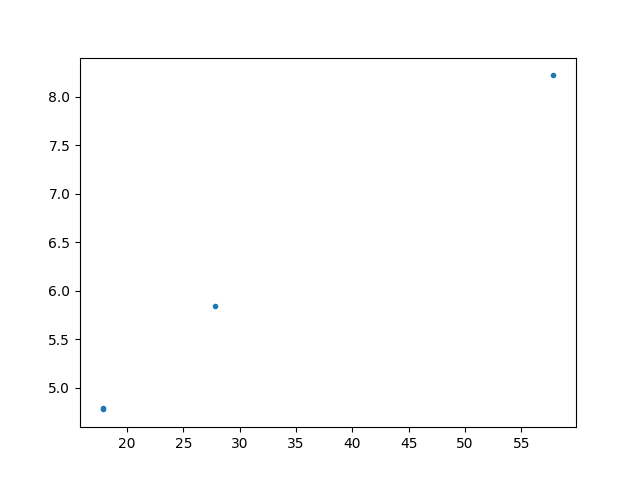

In [11]:
plt.clf()
plt.errorbar(m, T, sigma_T, xerr=sigma_m, fmt=".")
plt.show()

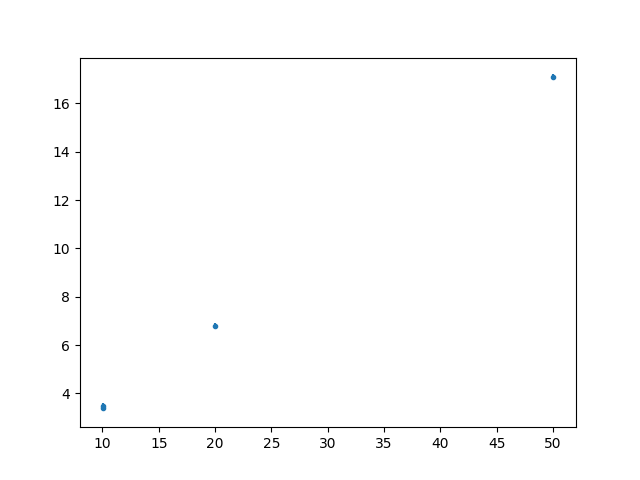

In [51]:
m = np.array([10.014, 10.009, 20.027, 50.045]) # in grammi
sigma_m = 0.001 * np.ones_like(m)
# in cm
l0 = 19.0
l1 = 22.5
l2 = 22.4
l3 = 25.8
l4 = 36.1

l = np.array([l1,l2,l3,l4])
l = l-l0
sigma_l = 0.1 * np.ones_like(l)

plt.clf()
plt.errorbar(m, l, sigma_l, xerr=sigma_m, fmt='.')
plt.show()

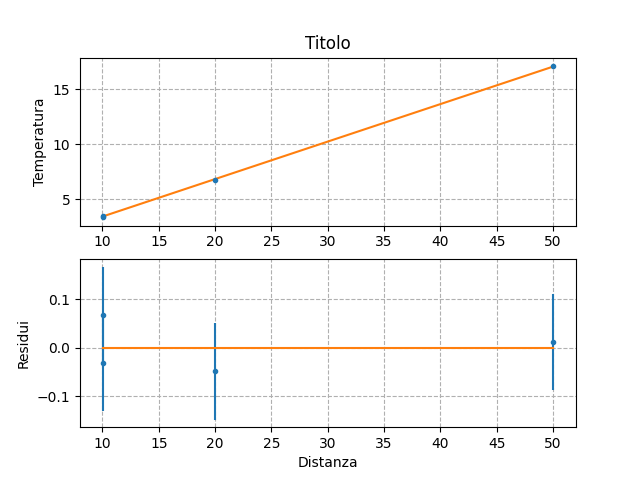

g/k = 0.3411152323731545 | b = 0.016805705107216632


In [52]:
popt, pcov, chisq = odr_fitting(line, m, l, sigma_l, sigma_m, (100.0,0))
plt.clf()
odr_plotting(line, m, l, sigma_l, sigma_m,popt)
sigma_k, sigma

print(f"g/k = {popt[0]} +/- {} | b = {popt[1]}")

In [ ]:
odr_fitting()